# EXPLORATORY DATA ANALYSIS - CUSTOMER PERSONAL ANALYSIS

# Latar Belakang 
Customer Personal Analysis diperlukan untuk menghemat pengeluaran perusahaan dalam memasarkan produknya. 
Maksudnya apa ? In this case dari pada mengeluarkan cost lebih untuk memasarkan banyak produk yg kemungkinan 
tidak semuanya menghasilkan keuntungan banyak yg berujung bisa membuat income turun, akan lebih baik jika 
perusahaan memasarkan beberapa produk saja yg berpotensi menghasilkan keuntungan lebih berdasarkan personal dan 
kebiasaan customer.

# Problem
Ketidak seimbangan pemasukan dari produk serta treatment untuk customer baru dan customer potensial 

# Batasan Masalah :
1. Semua produk (Wine, Fruit, Fish, Gold, Sweet, Meat)
2. Penjualan melalui web, store, dan catalog
3. Hanya terhitung 2 tahun 

# Tujuan
Meningkatkan pemasukan serta memperbanyak customer baru dan customer potensial

# Business Question :
1. Produk yang paling menghasilkan ? 
2. Produk dengan penghasilan tersedikit ? 
3. Seberapa banyak jumlah customer baru ?
4. Seberapa banyak jumlah customer potensial ?
5. Berapa diskon yg diberikan untuk customer baru ?
6. Bagaimana pengaruh tingkat pendidikan terhadap jumlah penjualan ?
7. Bagaimana pengaruh tingkat pendidikan terhadap jumlah customer ?

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. 
Dataset dapat diakses di sini -> (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). 

# Package
Untuk keperluan menjawab business question yang ada maka package yang perlu diimport sebagai berikut :

In [34]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import sklearn
# import statsmodels
import dateparser
import warnings
warnings.filterwarnings('ignore')

# Import Dataset
Dataset yang digunakan berasal dari (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). 

In [35]:
data=pd.read_csv('marketing_campaign.csv', header=0, sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# Membuat index dari kolom ID
data.set_index('ID')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [4]:
# pengecekan tipe data
print(f'Jumlah baris dan kolom di dataset data adalah {data.shape}')
data.info()

Jumlah baris dan kolom di dataset data adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-n

# Memunculkan Year
Untuk memunculkan tahun berlangganannya saja, dimulai dari tahun 2012,2013, dan 2014

In [36]:
import dateparser
data['Dt_Customer'] = data['Dt_Customer'].apply(dateparser.parse)

In [37]:
purchase_data=data['Dt_Customer'].dt

In [38]:
purchase_data.year

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64

In [39]:
data['Year']=purchase_data.year

# Cek Missing Value

In [9]:
# pengecekan missing value
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Year                    0
dtype: int64

In [10]:
# Deskripsi tiap kolom dalam tabel
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013.028125
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.684554
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000


# Bersihkan kolom yang tidak dipakai

In [41]:
# Data Cleaning -> Drop column yg tidak terpakai untuk analisa
data.drop(['Recency','NumDealsPurchases','NumWebVisitsMonth',
           'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response'],
          axis=1, inplace=True)

# Tambahkan kolom untuk keperluan analisa

In [42]:
# Data Preparation -> Add Column
data.insert(8,"MntProducts",data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+
            data["MntFishProducts"]+data["MntSweetProducts"]+data["MntGoldProds"])
# MntProducts -> kolom yg berisikan jumlah semua produk yg dibeli customer

In [43]:
# Data Preparation -> Add Column
data.insert(15,"NumPurchases",data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"])
# NumPurchases -> kolom yg berisikan jumlah pembelian customer melalui web, store, dan catalog

In [44]:
# membuat index dari kolom
data.set_index('ID')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntProducts,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year
ID,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,1617,635,88,546,172,88,88,22,8,10,4,2012
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,27,11,1,6,2,1,6,4,1,1,2,2014
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,776,426,49,127,111,21,42,20,8,2,10,2013
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,53,11,4,20,10,3,5,6,2,0,4,2014
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,422,173,43,118,46,27,15,14,5,3,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,1341,709,43,182,42,118,247,16,9,3,4,2013
4001,1946,PhD,Together,64014.0,2,1,2014-10-06,444,406,0,30,0,0,8,15,8,2,5,2014
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,1241,908,48,217,32,12,24,18,2,3,13,2014


# Business Question

In [17]:
# Untuk nomor 1 & 2
data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [18]:
summary = pd.DataFrame({
    'Products' : ['Wines','Fruits','Meat','Fish','Sweet','Gold'],
    'Total' : [680816,58917,373968,84057,60621,98609]
})
summary

,Products,Total
0,Wines,680816
1,Fruits,58917
2,Meat,373968
3,Fish,84057
4,Sweet,60621
5,Gold,98609


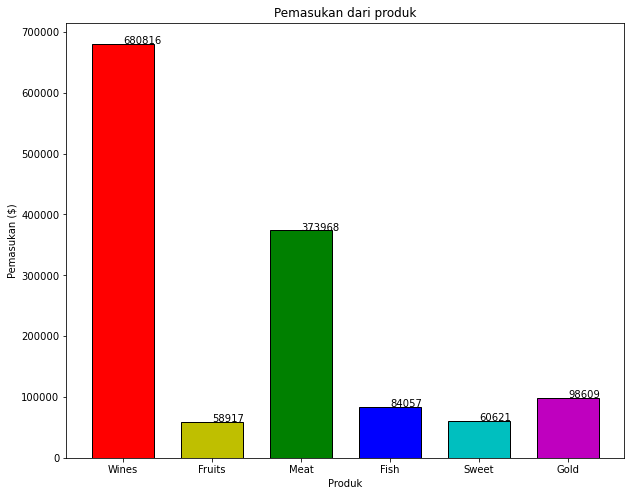

In [31]:
plt.figure(figsize=(10,8))
plt.bar(summary['Products'],summary['Total'],
       color = ['r','y','g','b','c','m'],
       edgecolor='k',linewidth=1,width=0.7)
plt.xlabel('Produk')
plt.ylabel('Pemasukan ($)')
plt.title('Pemasukan dari produk')
for i in summary['Total']:
           plt.text(summary[summary['Total']==i]['Products'],i,i)
plt.show()

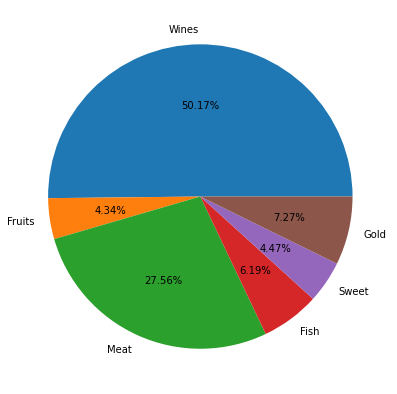

In [19]:
jumlah_pemasukan=[680816,58917,373968,84057,60621,98609]
produk=['Wines','Fruits','Meat','Fish','Sweet','Gold']
plt.figure(figsize=(8,7))
plt.pie(jumlah_pemasukan, labels = produk,autopct='%1.2f%%')
plt.show()

# 1. Produk yang paling menghasilkan ? 


# 2. Produk dengan penghasilan tersedikit ? 


# 3. Berapa banyak jumlah customer baru ?


In [47]:
# Nomor 3
data_newcust=data[((data['NumWebPurchases'] == 1) | (data['NumStorePurchases'] == 1 )| (data['NumCatalogPurchases'] == 1)) & 
     (data['Year'] == 2014)]
data_newcust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 2229
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   231 non-null    int64         
 1   Year_Birth           231 non-null    int64         
 2   Education            231 non-null    object        
 3   Marital_Status       231 non-null    object        
 4   Income               227 non-null    float64       
 5   Kidhome              231 non-null    int64         
 6   Teenhome             231 non-null    int64         
 7   Dt_Customer          231 non-null    datetime64[ns]
 8   MntProducts          231 non-null    int64         
 9   MntWines             231 non-null    int64         
 10  MntFruits            231 non-null    int64         
 11  MntMeatProducts      231 non-null    int64         
 12  MntFishProducts      231 non-null    int64         
 13  MntSweetProducts     231 non-null 

# 4. Berapa banyak customer potensial ?

In [48]:
# Nomor 4
data_potcust=data[((data['NumWebPurchases'] == 0) | (data['NumStorePurchases'] == 0 )| (data['NumCatalogPurchases'] == 0)) & 
     (data['Year'] == 2014)]
data_potcust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 3 to 2223
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   187 non-null    int64         
 1   Year_Birth           187 non-null    int64         
 2   Education            187 non-null    object        
 3   Marital_Status       187 non-null    object        
 4   Income               184 non-null    float64       
 5   Kidhome              187 non-null    int64         
 6   Teenhome             187 non-null    int64         
 7   Dt_Customer          187 non-null    datetime64[ns]
 8   MntProducts          187 non-null    int64         
 9   MntWines             187 non-null    int64         
 10  MntFruits            187 non-null    int64         
 11  MntMeatProducts      187 non-null    int64         
 12  MntFishProducts      187 non-null    int64         
 13  MntSweetProducts     187 non-null 

# 5. Berapa banyak diskon yang diberikan untuk customer baru ?

# 6. Bagaimana pengaruh tingkat pendidikan terhadap jumlah penjualan ?
 

In [22]:
perbandingan=data[['Education','NumPurchases']].groupby('Education') 
perbandingan.sum()
# Jumlah pembelian

,NumPurchases
Education,
2n Cycle,2346
Basic,282
Graduation,14291
Master,4625
PhD,6539


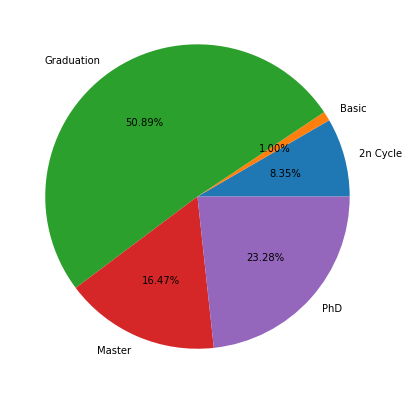

In [23]:
Jumlah=[2346,282,14291,4625,6539]
Pendidikan=['2n Cycle','Basic','Graduation','Master','PhD']
plt.figure(figsize=(8,7))
plt.pie(Jumlah, labels=Pendidikan,autopct='%1.2f%%')
#label menunjukan nama
plt.show()

# 7. Bagaimana perbandingan tingkat pendidikan terhadap jumlah customer ?

In [24]:
pd.crosstab(data['Education'], columns='Jumlah')
# Jumlah orang

col_0,Jumlah
Education,
2n Cycle,203
Basic,54
Graduation,1127
Master,370
PhD,486


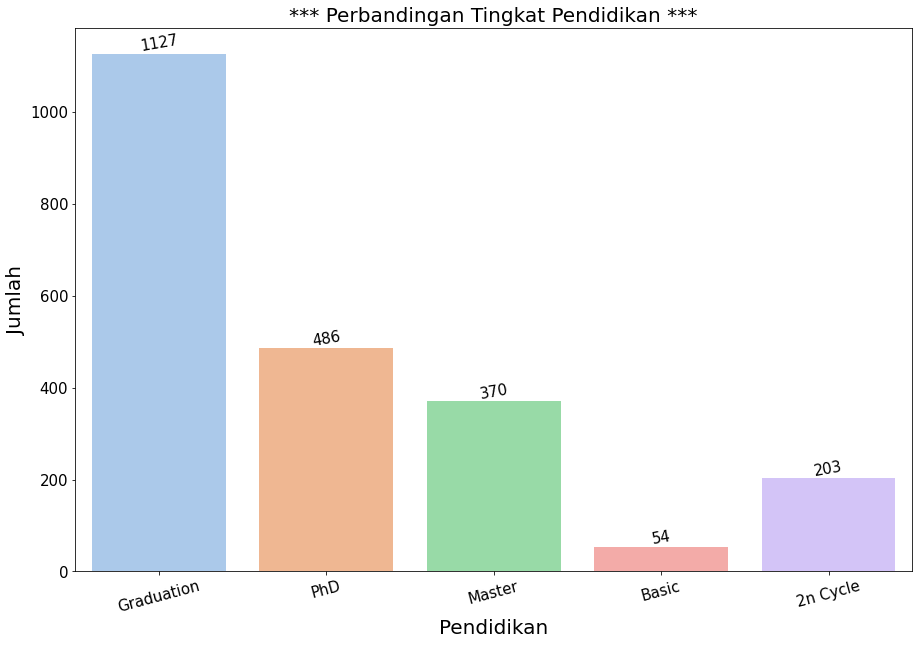

In [25]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Education', data=data, palette = 'pastel',linewidth=6)
plt.title("*** Perbandingan Tingkat Pendidikan ***",size=20)
plt.xlabel("Pendidikan", size=20, color='k')
plt.ylabel("Jumlah", size=20, color='k')
plt.xticks(size=15,rotation=15)
plt.yticks(size=15)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=10, horizontalalignment='left')
plt.show()

# Kesimpulan :
    
1. Terdapat 2 produk yang paling menghasilkan diantara 6 produk lainnya yaitu Wine dan Meat. Sedangkan keempat produk lainnya sangat jauh tertinggal dalam hal pemasukan. Menggunakan pendekatan berupa algoritma apriori (Machine Learning) Algoritma untuk "menambang" sekumpulan item yang sering muncul dan untuk mempelajari aturan asosiasi melalui relational database menjadi salah satu opsi untuk meningkatkan income
2. Customer baru hanya diambil dari waktu mulai berlangganan di tahun 2014 dan baru membeli 1 produk 1 kali berjumlah 231 orang. Sedangkan customer yang berpotensial adalah customer yang mulai berlangganan di tahun 2014 tetapi belum malkukan pembelian atau hanya melist produk-produk yang akan dibeli berjumlah 187 orang.
3. Jumlah customer baru sebanyak 231 orang atau 41,77% dari keseluruhan customer di tahun 2014 perlu ditingkatkan dengan memberikan diskon mulai dari 20%.
4. Secara garis besar tingkat pendidikan tiap jenjang menunjukan peningkatan/linear jumlah customer dan jumlah pembeliannya

In [33]:
data.to_excel("Capstone Modul 2 - Final.xlsx")